In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
from datasets import load_metric
from glob import glob

f1_metric = load_metric("f1")

PyTorch version 1.12.0+cu102 available.
2023-06-05 10:28:35.914831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 10:28:36.226692: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-9.0/lib64:/usr/local/cuda-9.0/lib64:
2023-06-05 10:28:36.226745: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-05 10:28:37.725980: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libra

In [2]:
def read_np_array(filename):
    with open(filename, "rb") as f:
        result = np.load(f)
    return result
  

y_test = read_np_array("y_test.npy")
y_test.mean()

0.14285714285714285

In [3]:
model_ids = [
    "roberta-base",
    "roberta-large",
    "cardiffnlp-twitter-roberta-base-sentiment",
    "cardiffnlp-twitter-roberta-base-irony",
    "jkhan447-sarcasm-detection-RoBerta-base-CR",
    "helinivan-english-sarcasm-detector",
    "brahimje-roberta-sarcasm-detection",
]
model_id2preds = {}
prediction_filenames = glob("predictions/*")

for model_id in model_ids:
    y_preds = []
    for prediction_filename in prediction_filenames:
        if prediction_filename.split("/")[-1].startswith(model_id):
            y_pred = read_np_array(prediction_filename)
            y_preds.append(np.array([y_pred]))
    model_id2preds[model_id] = np.concatenate(y_preds)

In [4]:
model_id2f1 = {}

for model_id, y_preds in model_id2preds.items():
    f1s = []
    for y_pred in y_preds:
        f1 = f1_metric.compute(predictions=y_pred, references=y_test)["f1"]
        f1s.append(f1)
    model_id2f1[model_id] = round(np.mean(f1s), 3)

print(json.dumps(model_id2f1, indent=2))

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

{
  "roberta-base": 0.202,
  "roberta-large": 0.25,
  "cardiffnlp-twitter-roberta-base-sentiment": 0.365,
  "cardiffnlp-twitter-roberta-base-irony": 0.393,
  "jkhan447-sarcasm-detection-RoBerta-base-CR": 0.281,
  "helinivan-english-sarcasm-detector": 0.294,
  "brahimje-roberta-sarcasm-detection": 0.743
}


In [19]:
def get_ensemble_prediction(y_preds, thd=0.5):
    n = y_preds.shape[0]
    return y_preds.mean(axis=0) >= thd

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

0.39227340267459143


Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

0.4077046548956661


Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

0.3686502177068215


Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

0.31188118811881194


Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/

0.8098159509202453


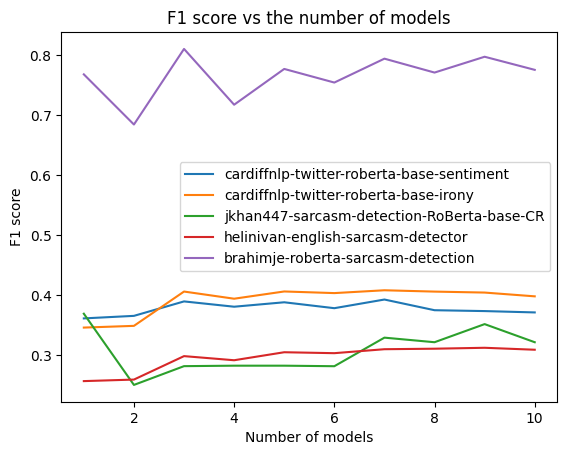

In [12]:
excluded = {"roberta-base", "roberta-large"}

for model_id, y_preds in model_id2preds.items():
    if model_id not in excluded:
        f1s = []
        for i in range(10):
            y_pred = get_ensemble_prediction(y_preds[:i+1])
            f1 = f1_metric.compute(predictions=y_pred, references=y_test)["f1"]
            f1s.append(f1)
        print(max(f1s))
        plt.plot(range(1, len(f1s)+1), f1s, label=model_id)

plt.legend()
plt.title("F1 score vs the number of models")
plt.xlabel("Number of models")
plt.ylabel("F1 score")
plt.show()

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

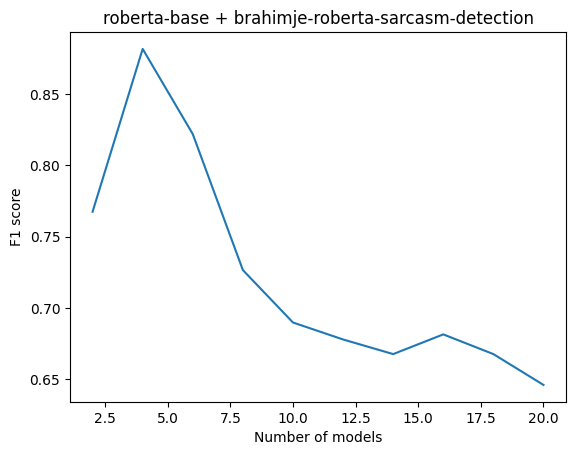

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

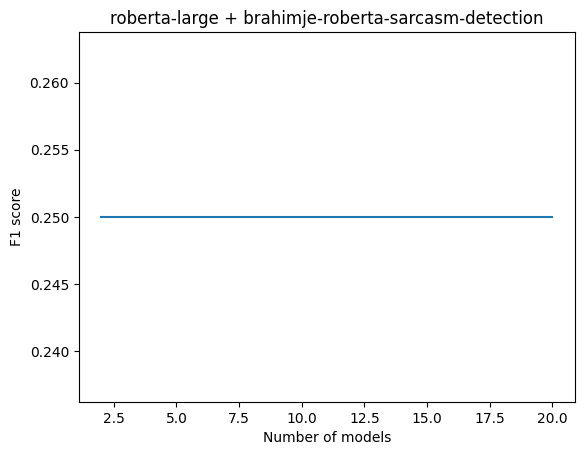

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

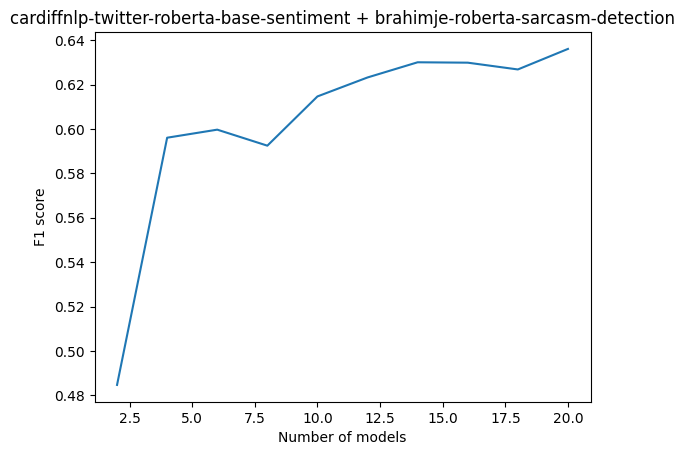

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

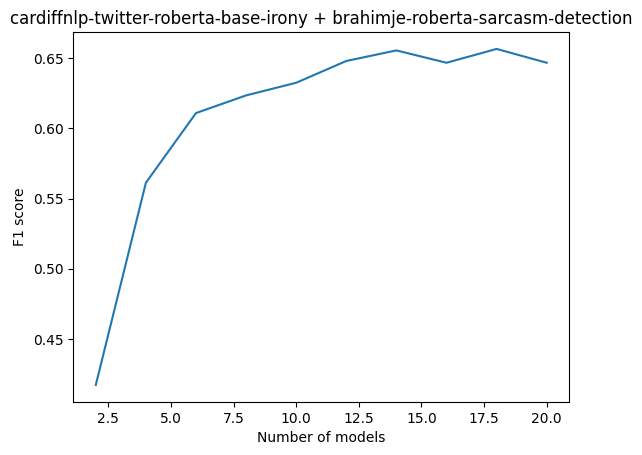

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

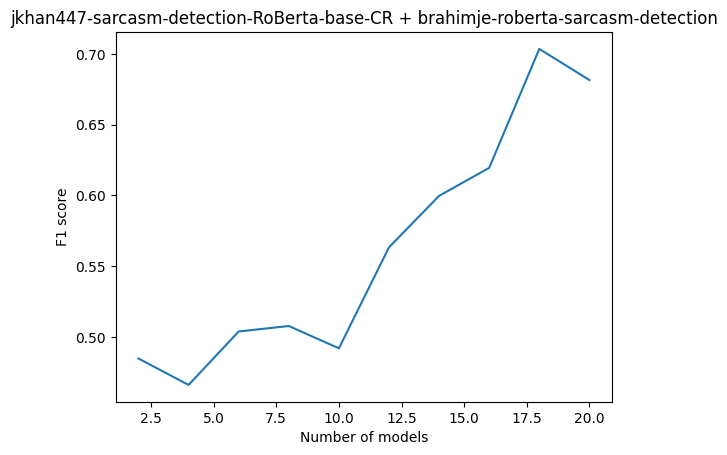

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

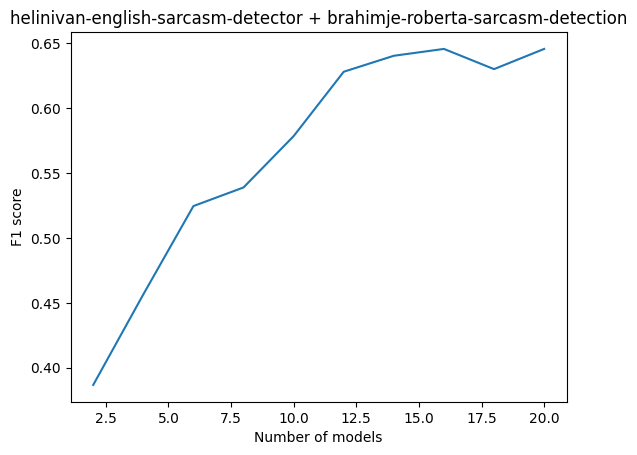

In [18]:
best_model_id = "brahimje-roberta-sarcasm-detection"

for model_id in model_ids:
    if model_id != best_model_id:
        pred1 = model_id2preds[model_id]
        pred2 = model_id2preds[best_model_id]
        f1s = []
        for i in range(pred1.shape[0]):
            y_preds = np.concatenate([pred1[:i+1], pred2[:i+1]])
            y_pred = get_ensemble_prediction(y_preds)
            f1 = f1_metric.compute(predictions=y_pred, references=y_test)["f1"]
            f1s.append(f1)
        plt.plot([int((i+1)*2) for i in range(len(f1s))], f1s)
        plt.title(f"{model_id} + {best_model_id}")
        plt.xlabel("Number of models")
        plt.ylabel("F1 score")
        plt.show()

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 1400 examples in 11200 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when 

0.9655172413793104


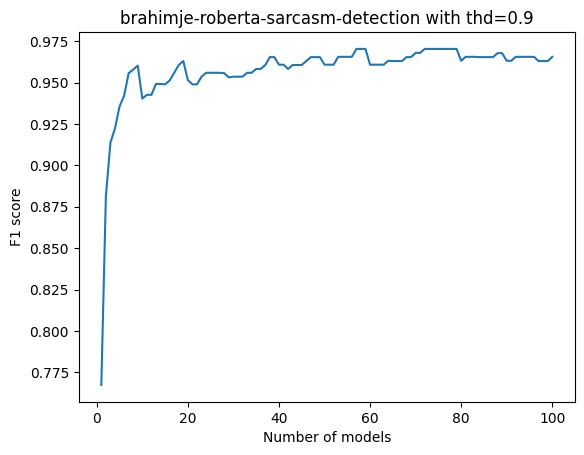

In [22]:
f1s = []
thd = 0.9
y_preds = model_id2preds[best_model_id]
for i in range(y_preds.shape[0]):
    y_pred = get_ensemble_prediction(y_preds[:i+1], thd=thd)
    f1 = f1_metric.compute(predictions=y_pred, references=y_test)["f1"]
    f1s.append(f1)

print(f1s[-1])
plt.plot(range(1, len(f1s)+1), f1s)
plt.title(f"{best_model_id} with {thd=}")
plt.xlabel("Number of models")
plt.ylabel("F1 score")
plt.show()